In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def loadDateSet(filename):
    dataMat = []
    fr = open(filename)
    for line in fr.readlines():
        # strip()移除首位空格
        curline = line.strip().split('\t')
        # map(func, iter) py3返回迭代器， py2返回列表
        fltLine = list(map(lambda x: float(x), curline))
        dataMat.append(fltLine)
    return dataMat

In [3]:
def distEclud(vecA, vecB):
    # 对应元素相减，对应元素平方
    # print(np.power(vecA-vecB, 2))
    return np.sqrt(sum(np.power(vecA-vecB, 2)))

In [4]:
def randCent(dataSet, k):
    n = dataSet.shape[1]
    print(dataSet.shape, n)
    # k个质心， 特征数为n, 为矩阵类型，可以直接centroids[:, j] = 1 + np.random.rand(k,1)
    # 如果是np.array(), 报错 (2,) 不能赋值(2,1)
    centroids = np.mat(np.zeros(shape=(k,n)))
    for j in range(n):
        minJ = min(dataSet[:,j])   # 特征J那一列最小值
        rangeJ = float(max(dataSet[:, j]) - minJ)  # 最大值-最小值
        centroids[:, j] = minJ + rangeJ * np.random.rand(k,1) # 最小值 + (最大值-最小值)* rand(k,1) # rand(k,1)就是shape=(2,1)的随机数
    return centroids

In [5]:
datMat = np.array(loadDateSet('testSet.txt'))
print(min(datMat[:,0]))

-5.379713


In [6]:
distEclud(datMat[0], datMat[1])

5.184632816681332

In [7]:
randCent(datMat, 2)

(80, 2) 2


matrix([[-2.58682001,  2.41326348],
        [ 3.61710421,  4.01379035]])

In [8]:
def Kmeans(dataSet, k, distMeans=distEclud, createCent=randCent):
    m = dataSet.shape[0]
    centroids = np.array(createCent(dataSet=dataSet, k=k))   # 随机质心
    
    clusterAssment = np.array(np.zeros((m,2)))       # 每个样本与质心的信息，[某个质心， 与该质心的距离]
    clusterChanged = True
    while clusterChanged:
        clusterChanged = False
        for i in range(m):   # 遍历每一个样本和每个质心，找出距离样本最近的质心
            minDist = np.inf; minIndex = -1
            for j in range(k):
                distJI = distMeans(dataSet[i,:], centroids[j,:])
                if distJI < minDist:
                    minDist = distJI; minIndex = j
                    
            if clusterAssment[i,0] != minIndex:
                clusterChanged = True
            clusterAssment[i, :] = minIndex, minDist**2
        print(centroids)
    
        for cent in range(k):   # 更新质心
            ptsInClust = dataSet[np.nonzero(clusterAssment[:,0] == cent)[0]]    # 第 cent 类的挑选出来
            centroids[cent, :] = np.mean(ptsInClust, axis=0)   # 按列求均值axis = 0
    
    return centroids, clusterAssment

In [9]:
myCentroids, clustAssing = Kmeans(dataSet=datMat, k=4, distMeans=distEclud, createCent=randCent)

(80, 2) 2
[[-2.64628995  2.01625253]
 [ 3.93943006 -1.51540045]
 [ 0.45063707  0.9232295 ]
 [ 1.41609424  2.08088886]]
[[-3.09528946  0.26892174]
 [ 2.97753205 -2.6512067 ]
 [-1.30649033 -2.18182617]
 [ 2.54391447  3.21299611]]
[[-2.79240923  2.07195618]
 [ 3.05021133 -2.82492178]
 [-2.81580542 -2.94247868]
 [ 2.46383071  3.1198451 ]]
[[-2.46154315  2.78737555]
 [ 2.80293085 -2.7315146 ]
 [-3.38237045 -2.9473363 ]
 [ 2.6265299   3.10868015]]


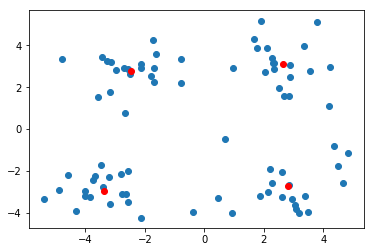

In [10]:
# def plot(dataSet, centrodis):
x, y = datMat[:, 0], datMat[:, 1]
cenx, ceny = myCentroids[:, 0], myCentroids[:,1]
plt.scatter(x,y)
plt.scatter(cenx, ceny, c='red')